<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_Exp_2_EDA_Sleep_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT 2**





**21-03-2024**

# **DATA PREPROCESSING AND VISUALIZATION FOR SLEEP, HEALTH AND LIFESTYLE DATASET**

># **2.A DATA PREPROCESSING**



**Importing Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

**Importing Datasets**

In [ ]:
#reading dataset 1
dataset1=pd.read_csv('/content/sleep_1.csv')
#reading dataset 2
dataset2=pd.read_csv('/content/sleep_2.csv')
datasets=[dataset1,dataset2]

> Displaying Dataset Description Before Cleaning



In [ ]:
#defining function for displaying dataset details
def display_description():
  i=1
  for dataset in datasets:
    #dataset
    print(f"\t DATASET {i}\t")
    #displays first 5 rows
    print(dataset.head())
    #displays dataset dimension
    print(f"\nShape of dataset {i} :{dataset.shape}")
    print(f"\nStatistical description of dataset {i}: ")
    #displays statistical description of dataset
    print(f"\n{dataset.describe()}")
    print(f"\nMissing value analysis of dataset {i}:")
    #displays number of missing values per column
    print(f"\n{dataset.isnull().sum()}")
    i+=1

In [ ]:
#calling the function
display_description()

	 DATASET 1	
   Person ID Gender   Age            Occupation  Sleep Duration  \
0          1   Male  27.0     Software Engineer             6.1   
1          2   Male  28.0                Doctor             6.2   
2          3   Male  28.0                Doctor             6.2   
3          4   Male  28.0  Sales Representative             5.9   
4          5   Male  28.0  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/8

**1. Data Cleaning**

In [ ]:
#removing duplicates from the dataset
dataset1=dataset1.drop_duplicates()
dataset2=dataset2.drop_duplicates()
#handling missing values
for dataset in datasets:
  dataset['Age'].fillna(dataset['Age'].mode()[0],inplace=True)
  dataset['Sleep Disorder'].fillna("No Disorder",inplace=True)

> Displaying Dataset Description After Cleaning

In [ ]:
#function to display
display_description()

	 DATASET 1	
   Person ID Gender   Age            Occupation  Sleep Duration  \
0          1   Male  27.0     Software Engineer             6.1   
1          2   Male  28.0                Doctor             6.2   
2          3   Male  28.0                Doctor             6.2   
3          4   Male  28.0  Sales Representative             5.9   
4          5   Male  28.0  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200    No Disorder  
1         125/8

**2. Data Integration**

In [ ]:
#concatenating datasets
merged_dataset=pd.concat([dataset1, dataset2], ignore_index=True)
print(merged_dataset)

     Person ID  Gender   Age            Occupation  Sleep Duration  \
0            1    Male  27.0     Software Engineer             6.1   
1            2    Male  28.0                Doctor             6.2   
2            3    Male  28.0                Doctor             6.2   
3            4    Male  28.0  Sales Representative             5.9   
4            5    Male  28.0  Sales Representative             5.9   
..         ...     ...   ...                   ...             ...   
369        370  Female  59.0                 Nurse             8.1   
370        371  Female  59.0                 Nurse             8.0   
371        372  Female  59.0                 Nurse             8.1   
372        373  Female  59.0                 Nurse             8.1   
373        374  Female  59.0                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1    

**3. Data Reduction**

In [ ]:
#dropping un-important columns to reduce complexity
merged_dataset.drop(columns=['Blood Pressure','Daily Steps'],inplace=True)
#storing instance of reduced dataset into new variable
merged_reduced_dataset=merged_dataset
print(merged_reduced_dataset)

     Person ID  Gender   Age            Occupation  Sleep Duration  \
0            1    Male  27.0     Software Engineer             6.1   
1            2    Male  28.0                Doctor             6.2   
2            3    Male  28.0                Doctor             6.2   
3            4    Male  28.0  Sales Representative             5.9   
4            5    Male  28.0  Sales Representative             5.9   
..         ...     ...   ...                   ...             ...   
369        370  Female  59.0                 Nurse             8.1   
370        371  Female  59.0                 Nurse             8.0   
371        372  Female  59.0                 Nurse             8.1   
372        373  Female  59.0                 Nurse             8.1   
373        374  Female  59.0                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1    

**4. Data Transformation**

In [ ]:
#putting  columns to be encoded into a list
columns_to_encode = ['Gender', 'Occupation', 'BMI Category','Sleep Disorder']
#storing instance of encoded dataset into new variable
encoded_dataset=merged_reduced_dataset

# Create LabelEncoder objects for each column
label_encoders = {}
#iterating through each column for encoding
for column in columns_to_encode:
    #creating instance of label encoder for each column
    label_encoders[column] = LabelEncoder()
    #updating column with encoded values
    encoded_dataset[column] = label_encoders[column].fit_transform(encoded_dataset[column])
print(encoded_dataset)

     Person ID  Gender   Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1  27.0           9             6.1                 6   
1            2       1  28.0           1             6.2                 6   
2            3       1  28.0           1             6.2                 6   
3            4       1  28.0           6             5.9                 4   
4            5       1  28.0           6             5.9                 4   
..         ...     ...   ...         ...             ...               ...   
369        370       0  59.0           5             8.1                 9   
370        371       0  59.0           5             8.0                 9   
371        372       0  59.0           5             8.1                 9   
372        373       0  59.0           5             8.1                 9   
373        374       0  59.0           5             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Heart

># **2.B DATA VISUALIZATION (EXPLORATORY DATA ANALYSIS)**

**Importing Necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

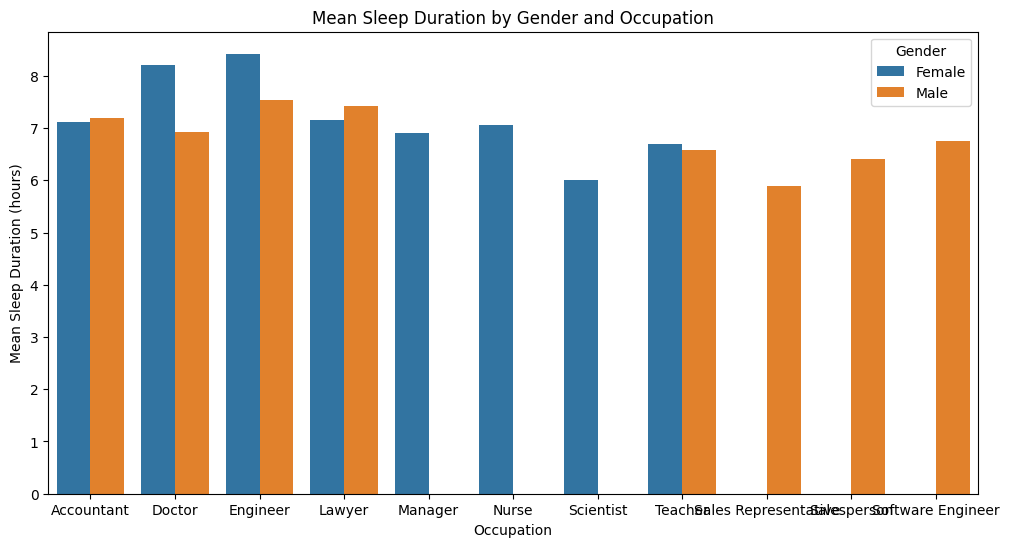

In [ ]:
#grouping for plotting 3 values in the bar graph
grouped = merged_reduced_dataset.groupby(['Gender', 'Occupation'])['Sleep Duration'].mean().reset_index()
#setting figure size
plt.figure(figsize=(12, 6))
#plotting
sns.barplot(x='Occupation', y='Sleep Duration', hue='Gender', data=grouped)
#setting title
plt.title('Mean Sleep Duration by Gender and Occupation')
#setting x label
plt.xlabel('Occupation')
#setting y label
plt.ylabel('Mean Sleep Duration (hours)')
#setting legend
plt.legend(title='Gender')
plt.show()

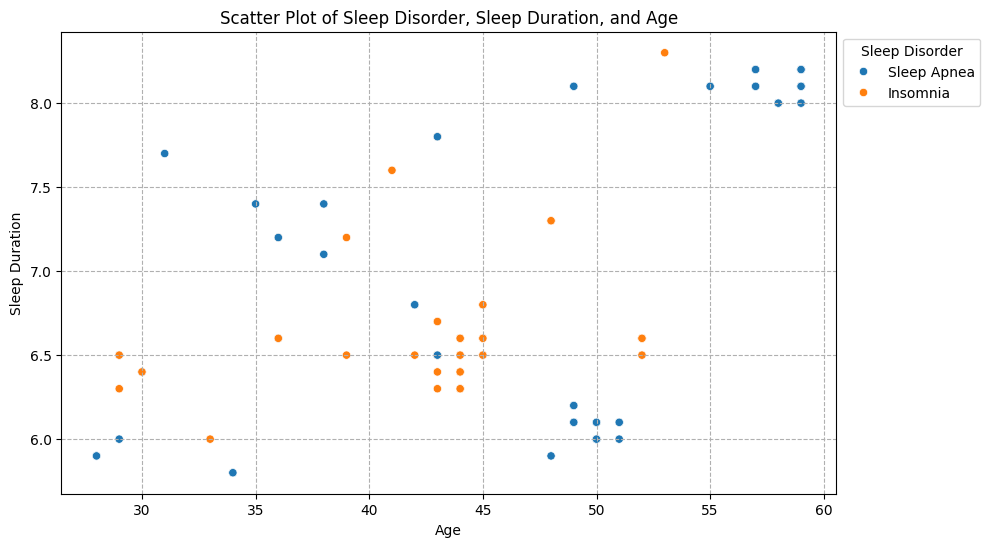

In [ ]:
#setting figure size
plt.figure(figsize=(10, 6))
#plotting
sns.scatterplot(x='Age', y='Sleep Duration', hue='Sleep Disorder', data=merged_reduced_dataset)
#setting title
plt.title('Scatter Plot of Sleep Disorder, Sleep Duration, and Age')
#setting xlabel
plt.xlabel('Age')
#setting ylabel
plt.ylabel('Sleep Duration')
#setting legend
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1, 1))
#plotting grid in the graph
plt.grid(True, linestyle='--')
plt.show()

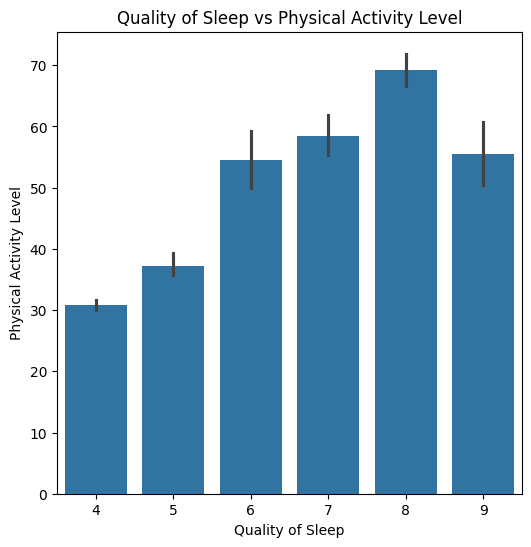

In [ ]:
#setting size
plt.figure(figsize=(6, 6))
#plotting
sns.barplot(x='Quality of Sleep', y='Physical Activity Level', data=merged_reduced_dataset)
#setting title
plt.title('Quality of Sleep vs Physical Activity Level')
#setting x label
plt.xlabel('Quality of Sleep')
#setting y label
plt.ylabel('Physical Activity Level')
plt.show()

**Correlation Heatmap**

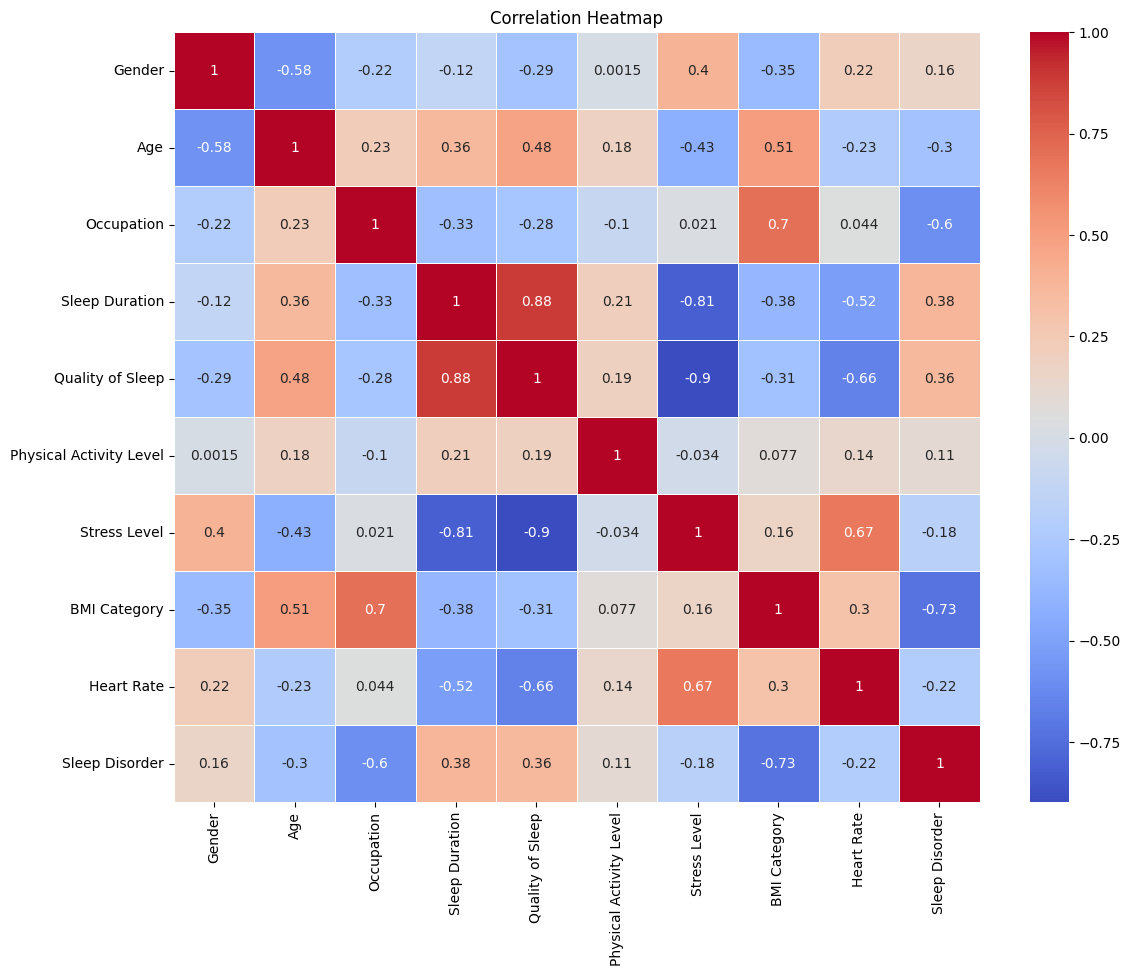

In [ ]:
# Calculate the correlation matrix
corr = encoded_dataset.drop(columns=['Person ID']).corr()
#setting figure size
plt.figure(figsize=(13, 10))
#plotting
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
#setting title
plt.title('Correlation Heatmap')
plt.show()

**Pair Plot**

<Figure size 3000x3000 with 0 Axes>

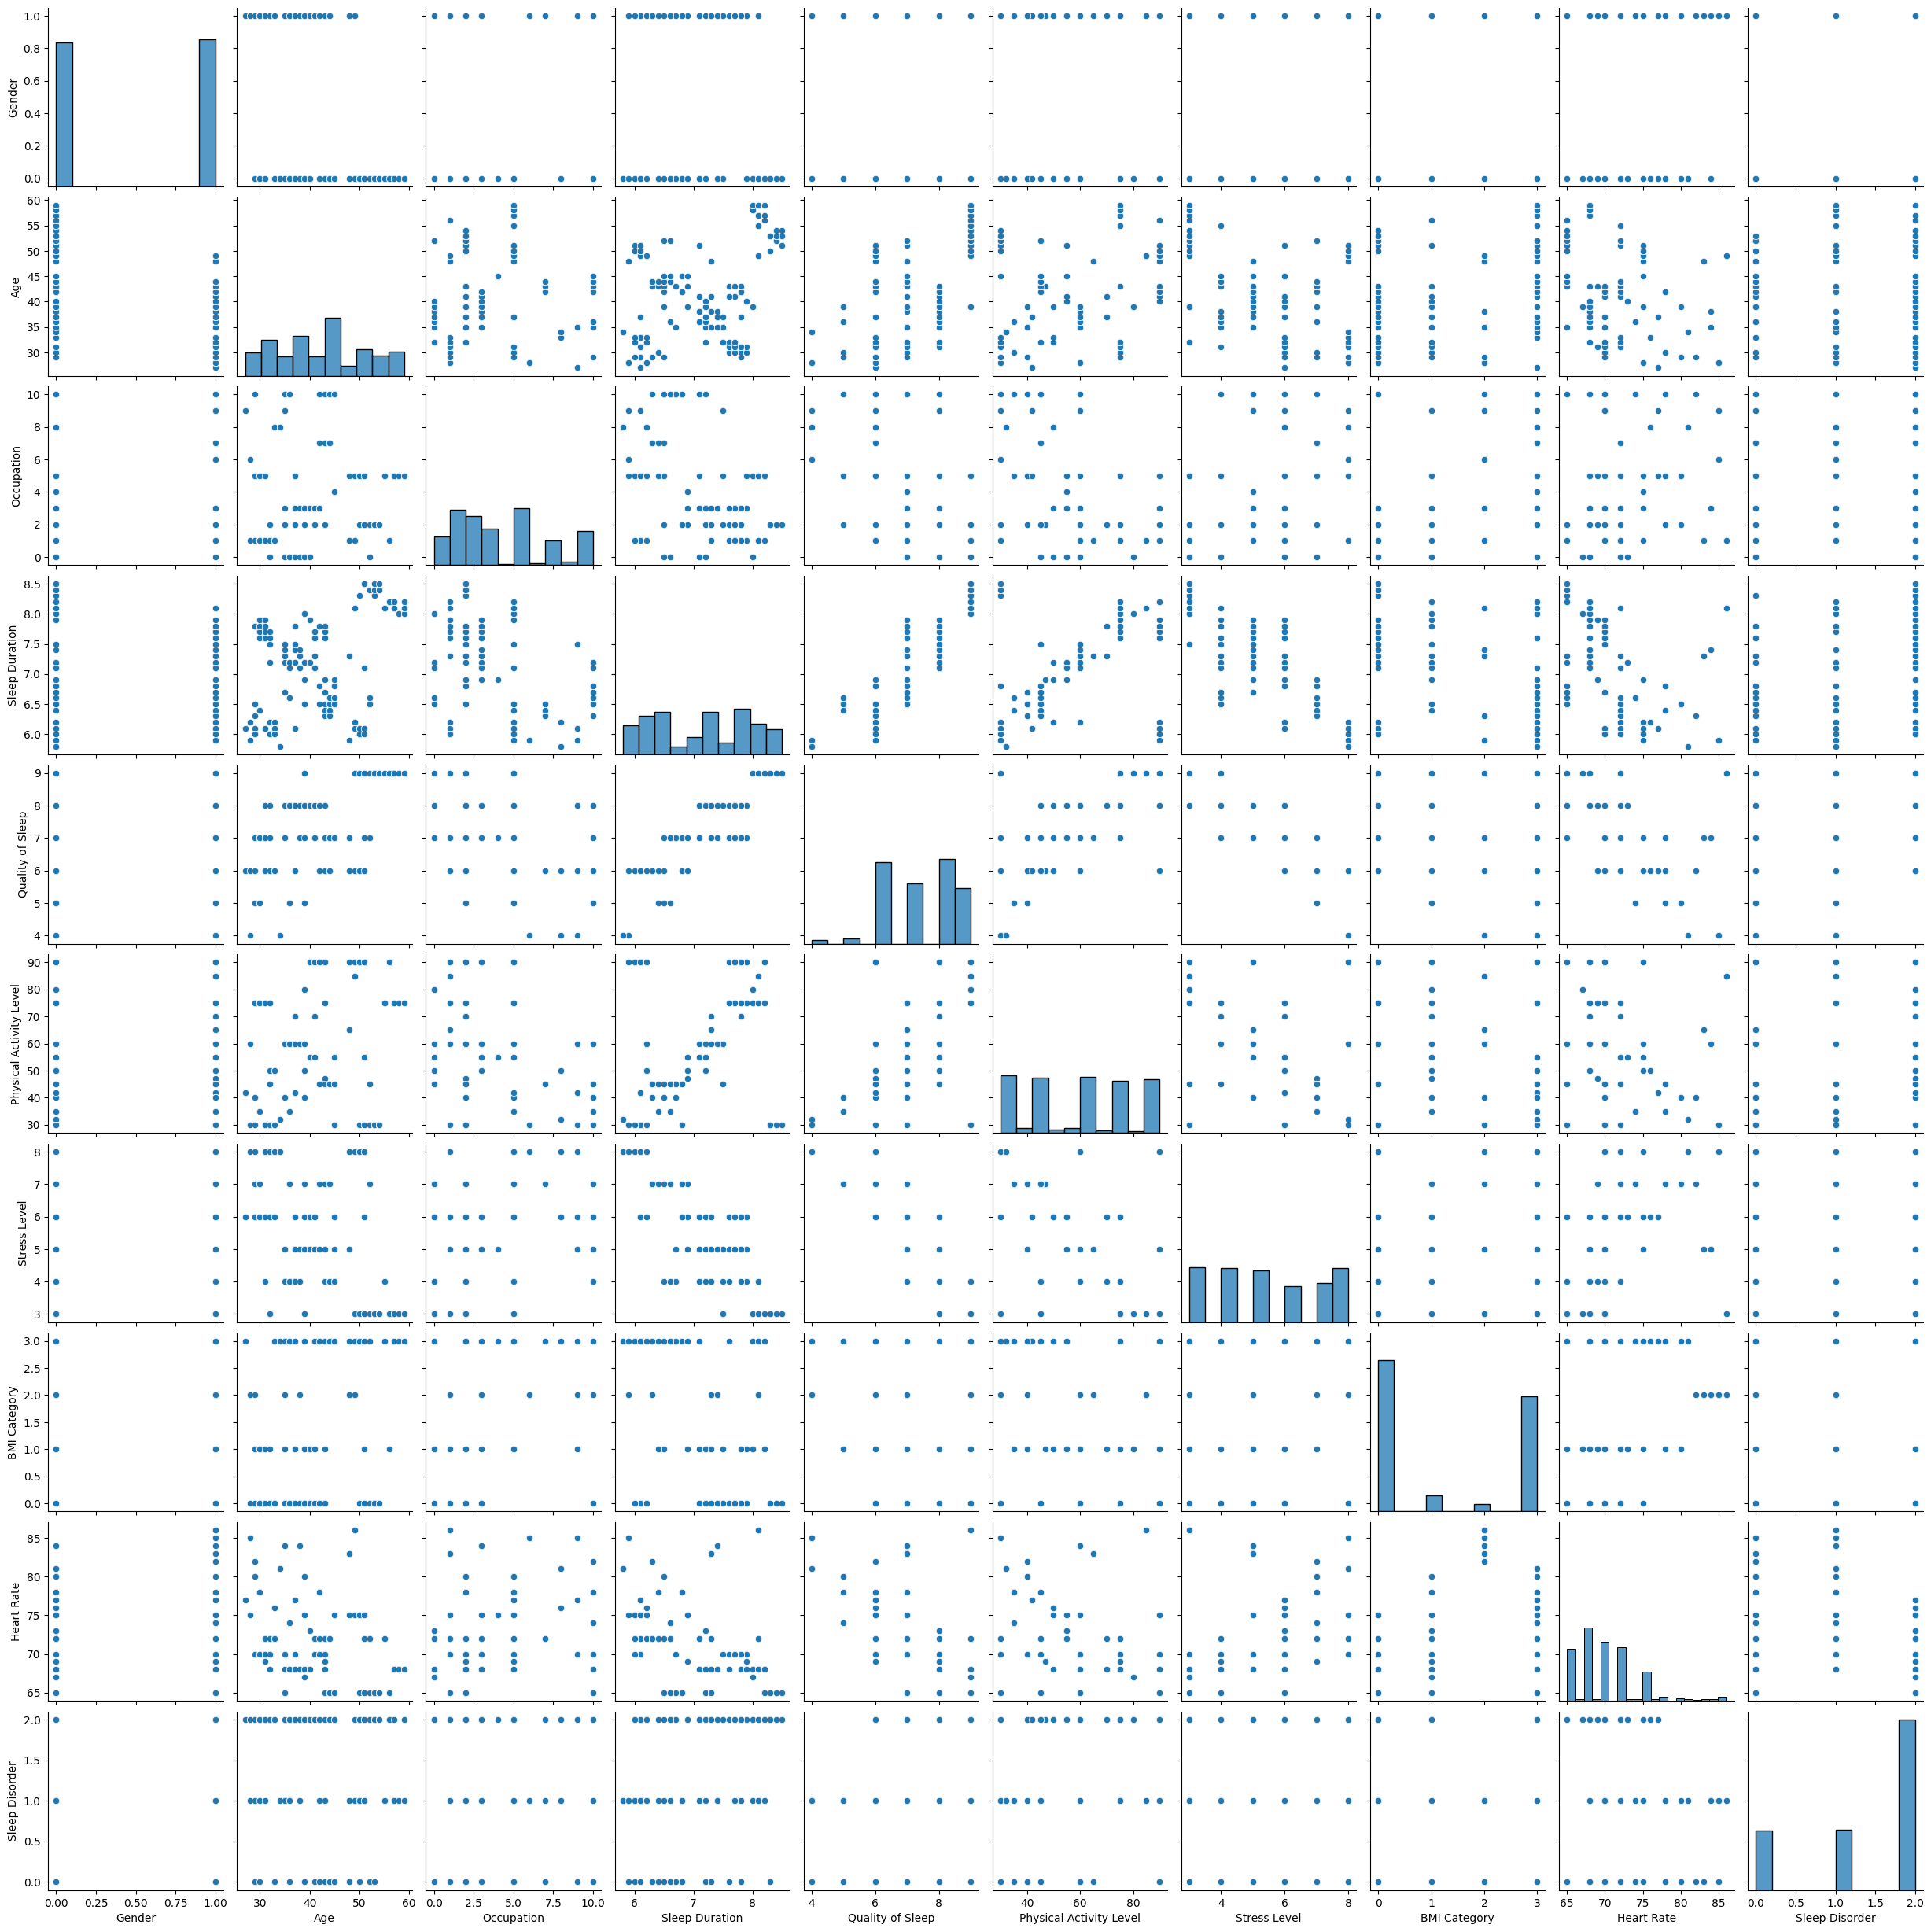

In [ ]:
#setting size
plt.figure(figsize=(30, 30))
#plotting
sns.pairplot(merged_reduced_dataset.drop(columns=['Person ID']))
plt.show()